In [1]:
%matplotlib inline
from shapely.geometry import Point, Polygon
import geopandas as gpd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame
import rtree

In [2]:
mpl.__version__, pd.__version__, gpd.__version__

('1.5.1', '0.19.2', '0.2.1')

## Point of this notebook was to make watershed specific geojsons

In [3]:
data_path = "../big_data_leave"

### Loading the watersheds + FEMA + HCAD reduced geojson

In [4]:
file_r_ws = "/Harvey_FEMA_HCAD_Damage_reduced_ws.geojson"
filePath_r_ws = data_path+file_r_ws
df_r_ws = gpd.read_file(filePath_r_ws)

In [5]:
print(type(df_r_ws))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [6]:
df_r_ws.head()

,ACCOUNT,ACREAGE,CONDO_FLAG,COUNTY,DMG_LEVEL,FIPS,HCAD_NUM,IMPROVEMEN,IN_DEPTH,KEY_MAP,...,UNITS,UNIT_PRICE,UNIT_TYPE,WTSHNAME,WTSHUNIT,YR_IMPR,city,cohgis_COU,geometry,index_right
0,1202010030003,.2364,0,Fort Bend,AFF,48157,1202010030003,209721,0.189537,486T,...,7500.0000,5.35,SF,BARKER RESERVOIR,T,2000,KATY,0.0,POINT (-95.7323 29.7358),3
1,1202010030004,.2001,0,Fort Bend,AFF,48157,1202010030004,232781,0.559052,486T,...,7500.0000,5.35,SF,BARKER RESERVOIR,T,2000,KATY,0.0,POINT (-95.732 29.7356),3
2,0220120000001,1.2186,0,Fort Bend,AFF,48157,0220120000001,0,1.050186,444Y,...,53082.0000,7.00,SF,BARKER RESERVOIR,T,,KATY,0.0,POINT (-95.825 29.7878),3
3,1202010010026,1.1930,0,Fort Bend,AFF,48157,1202010010026,0,0.189056,486T,...,,,,BARKER RESERVOIR,T,,KATY,0.0,POINT (-95.73350000000001 29.7363),3
4,0481040000013,.8235,0,Harris,AFF,48201,0481040000013,0,0.040237,444K,...,35872.0000,1.20,SF,BARKER RESERVOIR,T,,KATY,0.0,POINT (-95.8323 29.818),3


NameError: name 'df' is not defined

In [10]:
c.crs

{'init': 'epsg:4326'}

In [18]:
watersheds = df_r_ws.WTSHNAME.unique()

In [15]:
df_r_ws_WHITEOAKBAYOU = df_r_ws[df_r_ws['WTSHNAME'].str.contains("WHITE OAK BAYOU")]

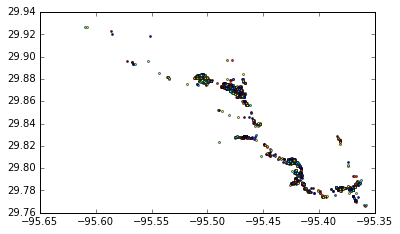

In [17]:
df_r_ws_WHITEOAKBAYOU.plot()

In [19]:
print(watersheds)

['BARKER RESERVOIR' 'CEDAR BAYOU' 'ADDICKS RESERVOIR' 'GREENS BAYOU'
 'CARPENTERS BAYOU' 'WHITE OAK BAYOU' 'HUNTING BAYOU' 'SAN JACINTO RIVER'
 'CYPRESS CREEK' 'SPRING CREEK' 'WILLOW CREEK' 'LITTLE CYPRESS CREEK'
 'LUCE BAYOU' 'JACKSON BAYOU' 'BUFFALO BAYOU' 'SPRING GULLY & GOOSE CREEK'
 'BRAYS BAYOU' 'VINCE BAYOU' 'SIMS BAYOU' 'CLEAR CREEK' 'ARMAND BAYOU'
 'SAN JACINTO & GALVESTON BAY']


In [22]:
watersheds[3]  

'GREENS BAYOU'

In [29]:
for i in watersheds:
    p = i.replace(" ","_")
    print(p)

BARKER_RESERVOIR
CEDAR_BAYOU
ADDICKS_RESERVOIR
GREENS_BAYOU
CARPENTERS_BAYOU
WHITE_OAK_BAYOU
HUNTING_BAYOU
SAN_JACINTO_RIVER
CYPRESS_CREEK
SPRING_CREEK
WILLOW_CREEK
LITTLE_CYPRESS_CREEK
LUCE_BAYOU
JACKSON_BAYOU
BUFFALO_BAYOU
SPRING_GULLY_&_GOOSE_CREEK
BRAYS_BAYOU
VINCE_BAYOU
SIMS_BAYOU
CLEAR_CREEK
ARMAND_BAYOU
SAN_JACINTO_&_GALVESTON_BAY


In [ ]:
print(watersheds)

In [38]:
#### This function takes in a geojson, an array of strings, and a column header and makes excepts. 
#### Each is a new geojson whose rows for the given column header match one of the strings in the array of strings. 
#### If there are 5 strings in the string array and all exist in the geojson at that column header, then 5 geojsons should be produced. 
def makegeojsonAttributeExcerpts(geojson,watershedsArray,colHeader):
    data_path = "../big_data_leave"
    for i in watershedsArray:
        watershedFileName = i.replace(" ","_")
        watershedFileName = watershedFileName.replace("&","_")
        geojson_holder = geojson[geojson[colHeader].str.contains(i)]
        ws_out = data_path+"/HarrisCnty_FEMAdamHCADwatershed_"+watershedFileName+".geojson"
        geojson_holder.to_file(ws_out, driver='GeoJSON')

In [39]:
### NOTE: If you call this more than once and try to write to the same filenames, you will see an error below. 
makegeojsonAttributeExcerpts(df_r_ws,watersheds,"WTSHNAME")

ValueError: Null layer